<a href="https://colab.research.google.com/github/Abishek0411/Computer-Vision-Projects/blob/main/CV_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 3 — Hough Transform & RANSAC for Line/Circle/Ellipse Detection

*   Detect prominent lines (Hough lines) and circles (HoughCircles) in images (road lane lines, coins)
*   Implement RANSAC straight-line fit on noisy edge points
*   Demonstrate parameter tuning & speed/accuracy trade-offs

In [13]:
# !pip -q install opencv-python-headless==4.7.0.72 scikit-image matplotlib numpy scipy scikit-learn
import cv2, sys, os, numpy as np, matplotlib.pyplot as plt
from skimage import filters, feature, morphology, measure, color, io
plt.rcParams['figure.figsize'] = (10,6)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Hough Lines')

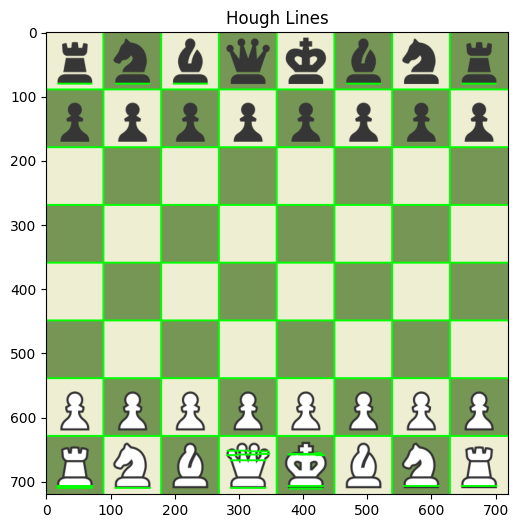

In [25]:
# Load image (use lane image link or camera)
img = cv2.imread('/content/chess.jpg') # or use cv2.imread(url) after download
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Hough lines (probabilistic)
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=80, minLineLength=50, maxLineGap=10)
out = img.copy()
if lines is not None:
    for x1,y1,x2,y2 in lines[:,0]:
        cv2.line(out,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)); plt.title('Hough Lines')



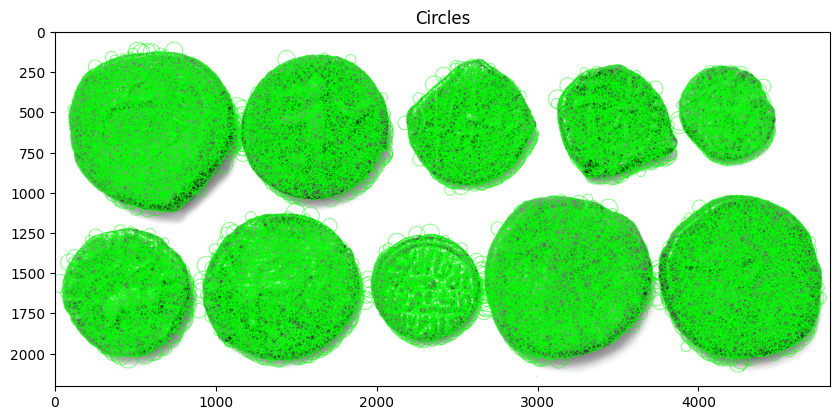

In [26]:
# Hough circles (coins)
coins = cv2.imread('/content/coin.jpg', cv2.IMREAD_GRAYSCALE)
img_c = cv2.medianBlur(coins,5)
circles = cv2.HoughCircles(img_c, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=10, maxRadius=60)
if circles is not None:
    circles = np.uint16(np.around(circles))
    cimg = cv2.cvtColor(img_c, cv2.COLOR_GRAY2BGR)
    for i in circles[0,:]:
        cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    plt.imshow(cimg); plt.title('Circles')


In [27]:
from sklearn.linear_model import RANSACRegressor
# sample points from edge map
ys, xs = np.nonzero(edges)
X = xs.reshape(-1,1); y = ys
ransac = RANSACRegressor(min_samples=2, residual_threshold=2, random_state=42).fit(X, y)
line_y = ransac.predict(np.array([[0],[img.shape[1]]]))
